In [1]:
import pandas as pd
import re
from parse import parse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
df = pd.read_csv('../CleanData/trainDataAfterClean.csv')

In [3]:
def dropOneHotMonthAndYearAndClassid(df):
    years, months = [c for c in df.columns.values if re.match('year_', c)], [c for c in df.columns.values if re.match('month_', c)]
    classids = [c for c in df.columns.values if re.match('class_id_', c)]
    year_data = [100*int(parse('year_{}', y)[0]) for y in df[years].idxmax(1).values]
    month_data = [int(parse('month_{}', y)[0]) for y in df[months].idxmax(1).values]
    classid_data  = [parse('class_id_{}', y)[0] for y in df[classids].idxmax(1).values]
    df['date'] = list(map(str, np.add(year_data, month_data)))
    df['classid'] = classid_data
    return df.drop(years+months+classids, axis=1)

In [4]:
_df = dropOneHotMonthAndYearAndClassid(df)
columns = _df.columns.values
columns = np.append(columns[-2:], columns[0:-2])
_df = _df[columns]

c:\users\yw59785\python\python35\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


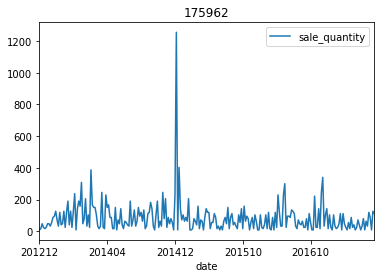

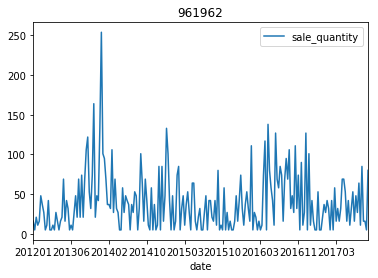

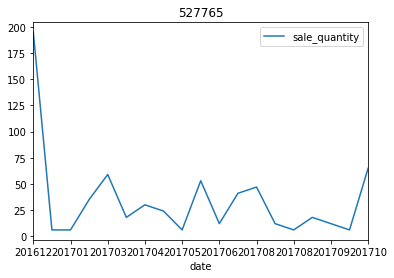

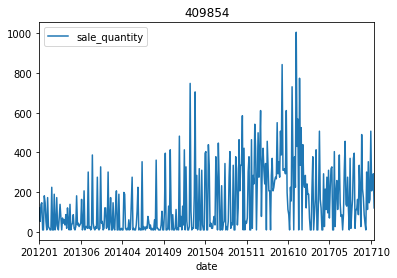

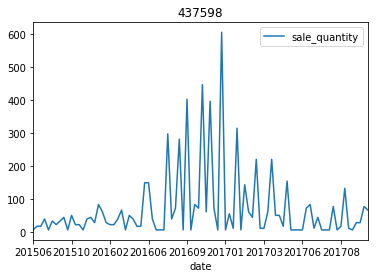

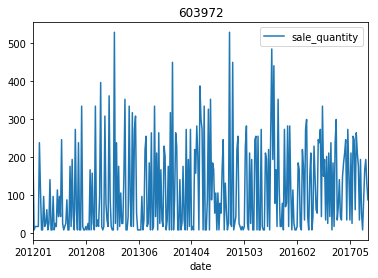

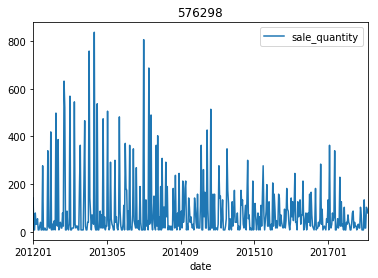

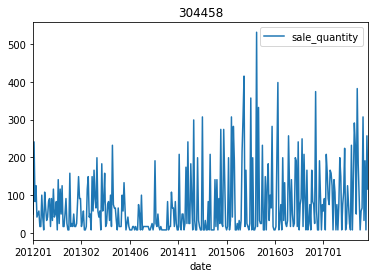

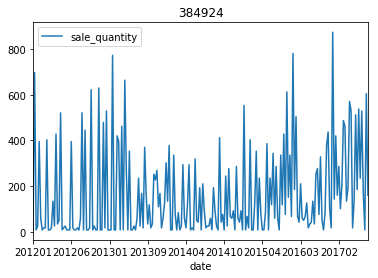

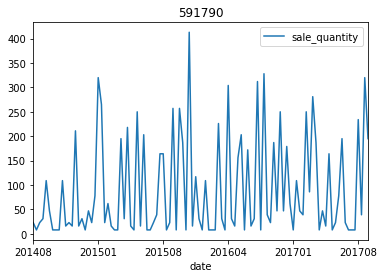

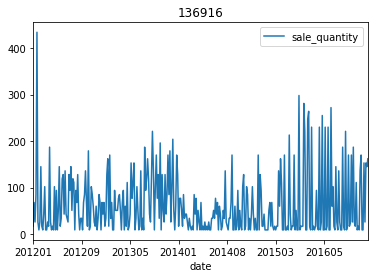

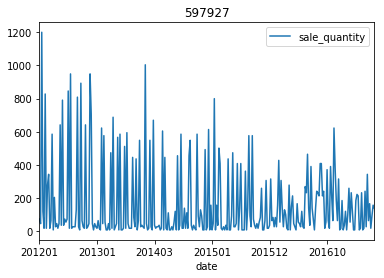

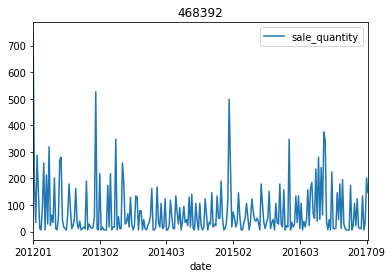

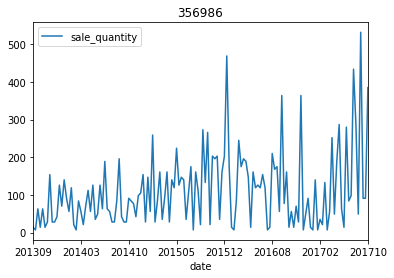

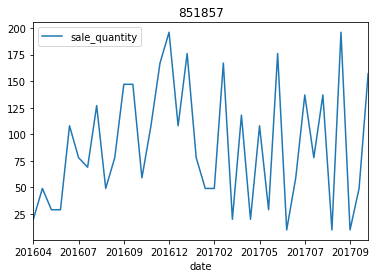

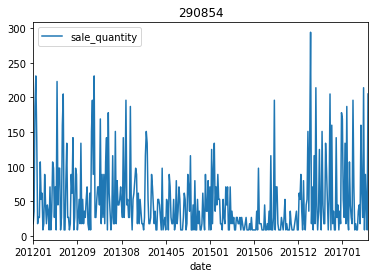

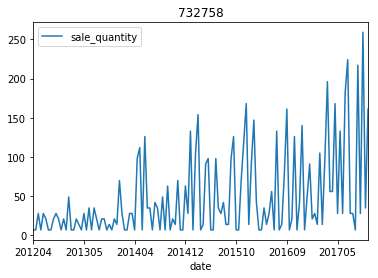

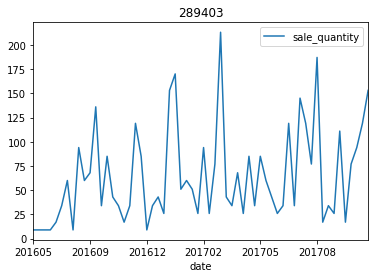

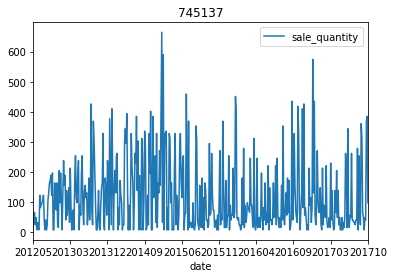

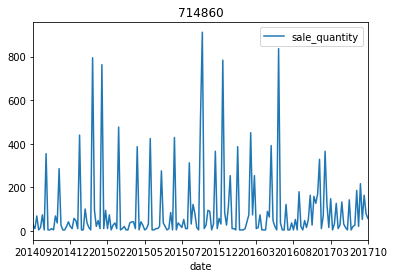

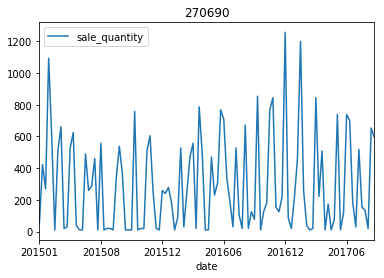

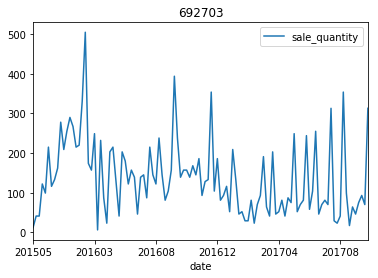

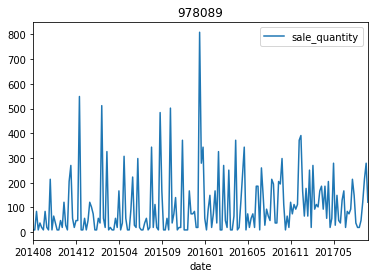

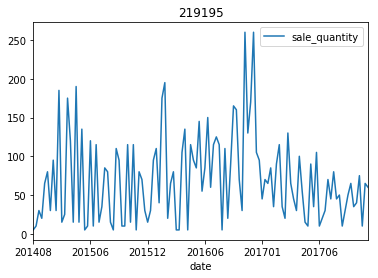

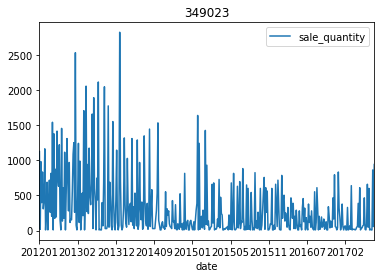

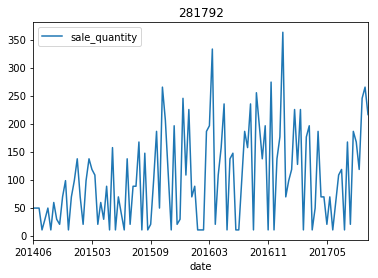

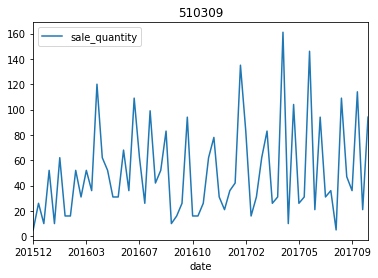

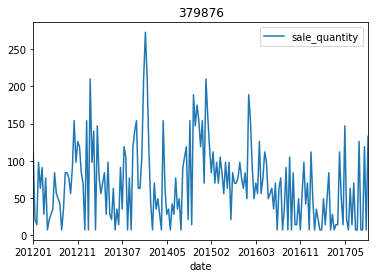

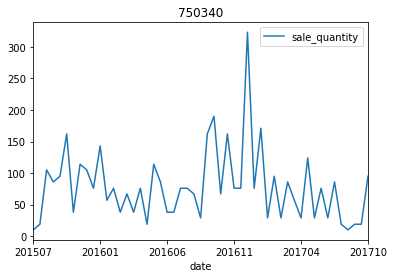

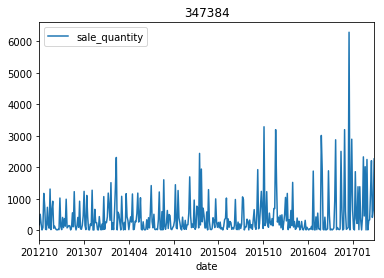

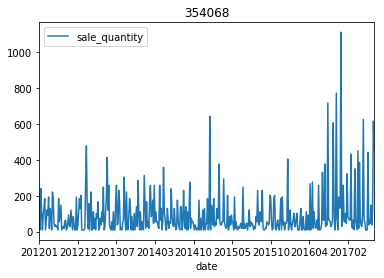

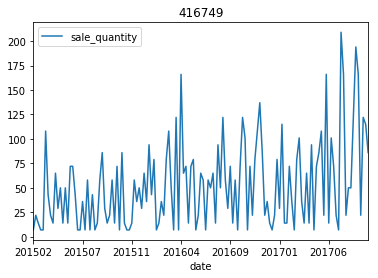

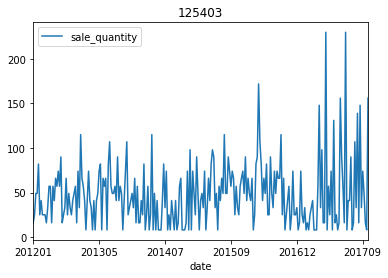

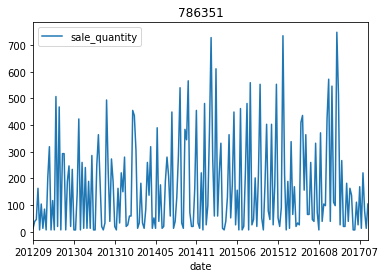

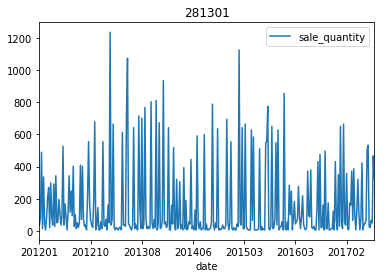

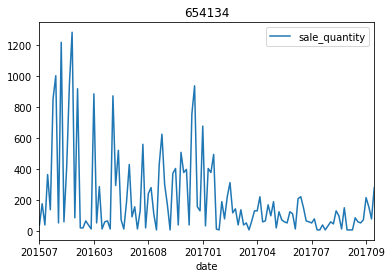

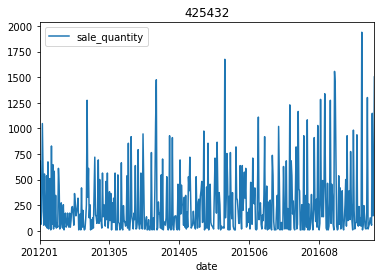

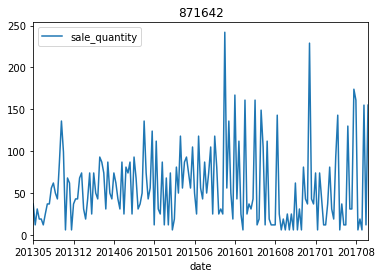

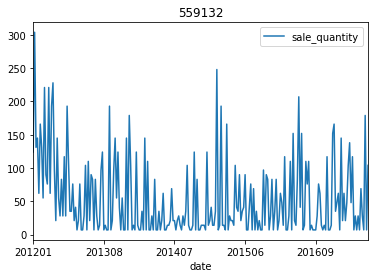

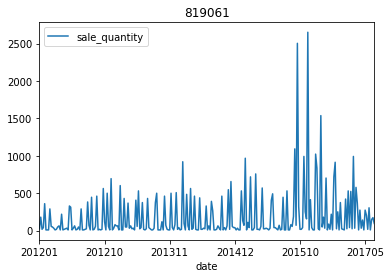

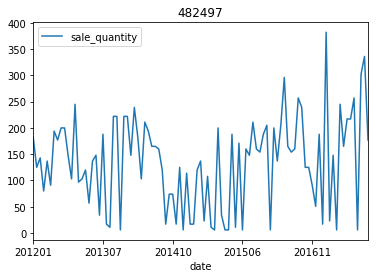

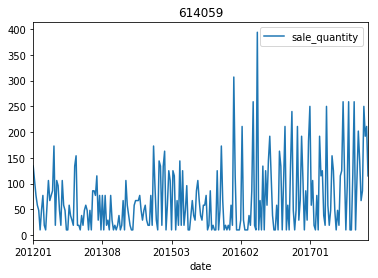

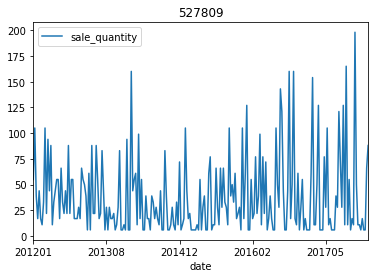

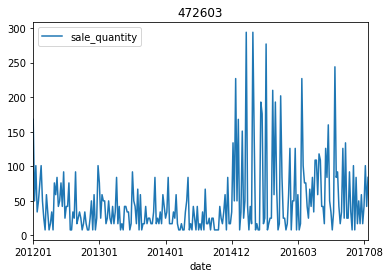

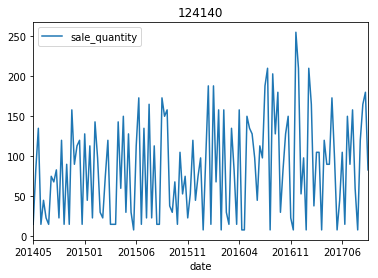

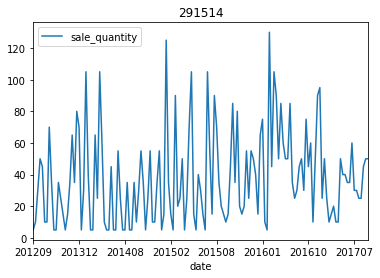

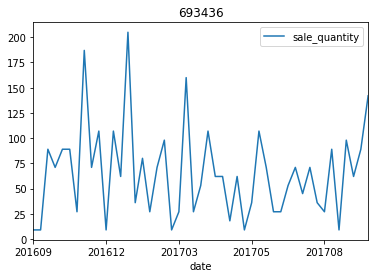

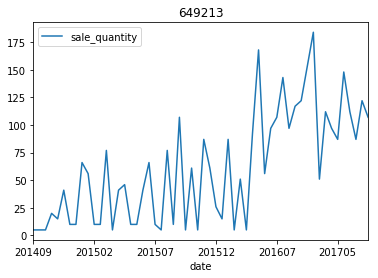

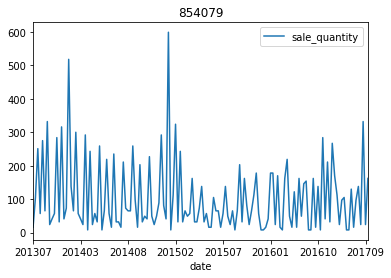

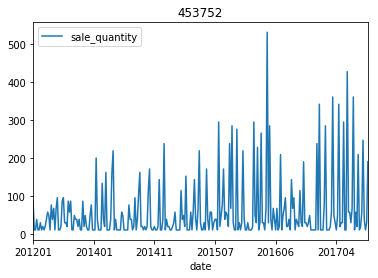

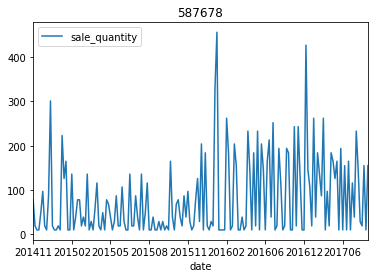

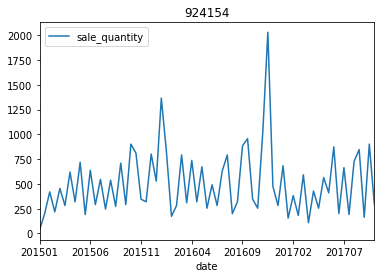

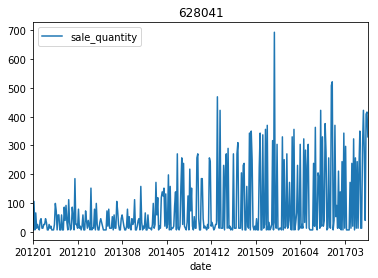

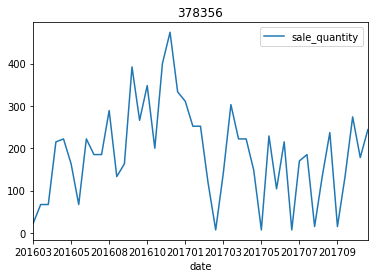

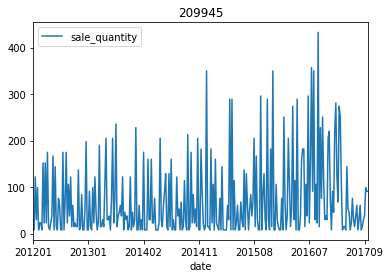

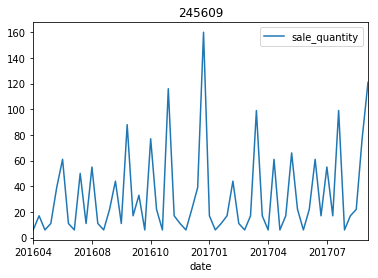

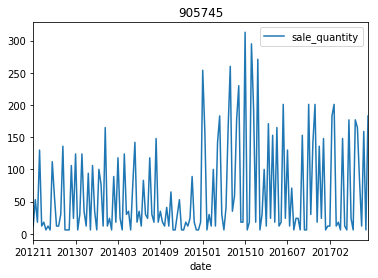

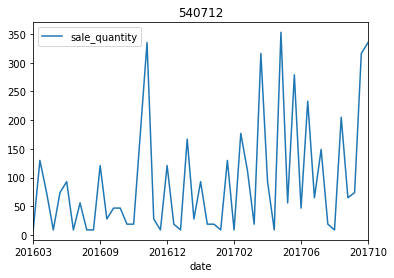

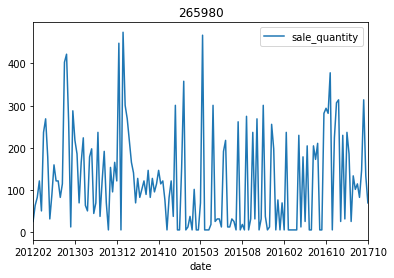

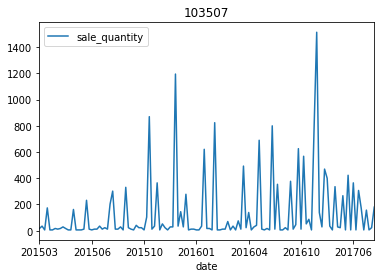

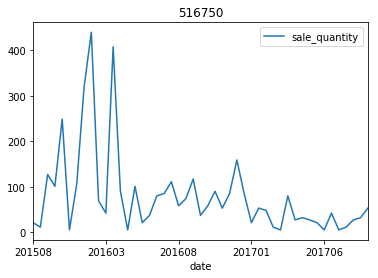

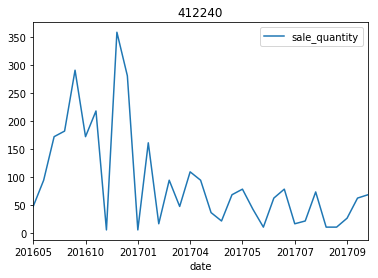

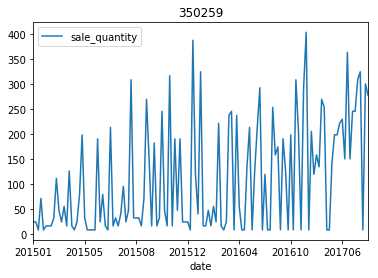

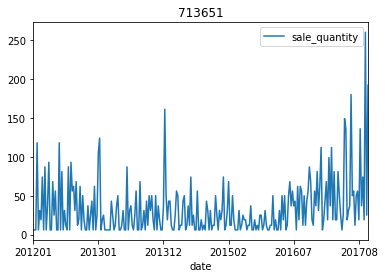

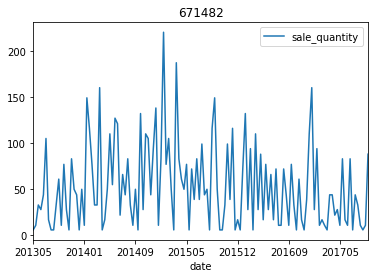

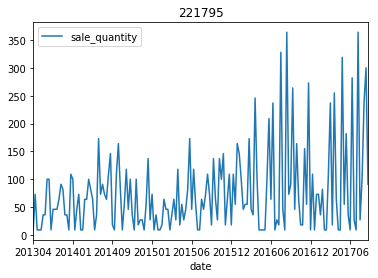

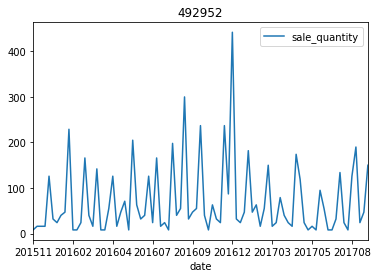

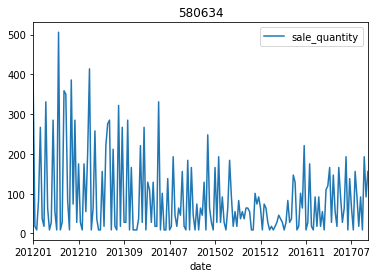

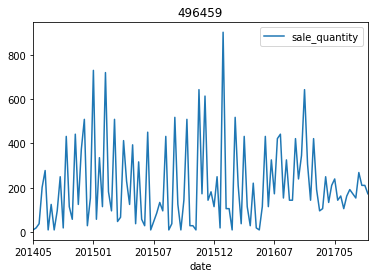

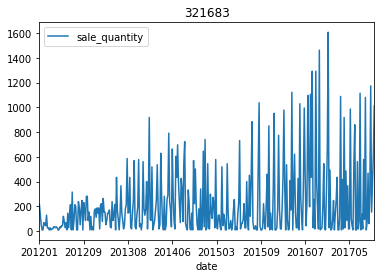

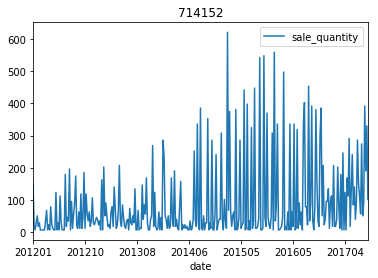

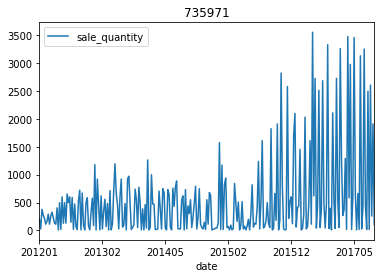

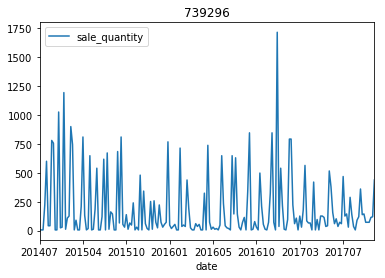

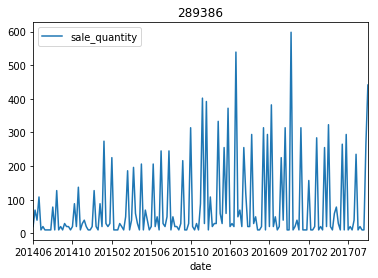

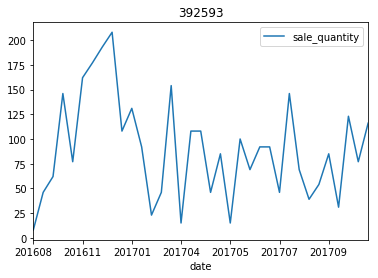

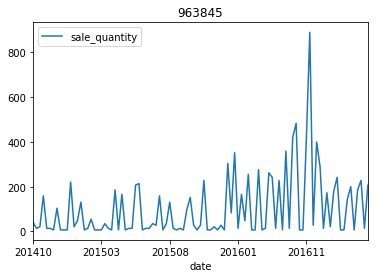

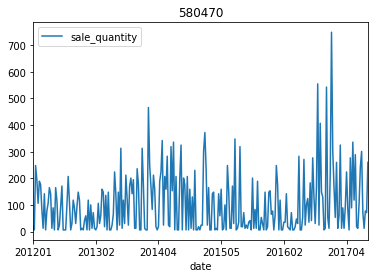

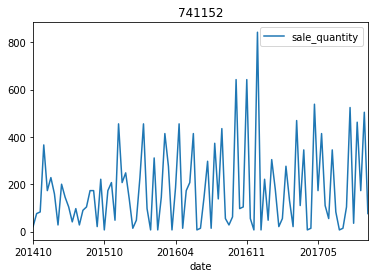

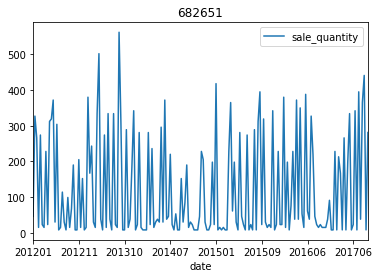

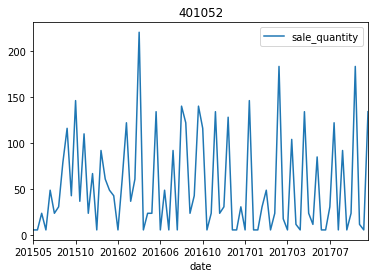

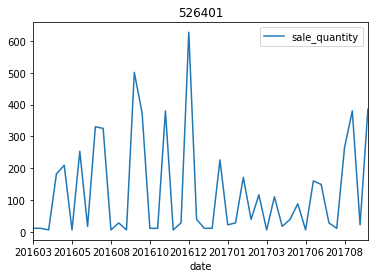

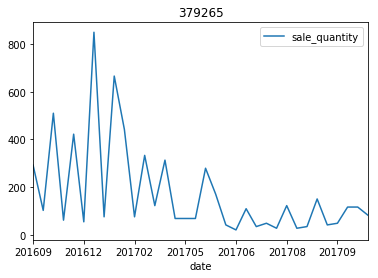

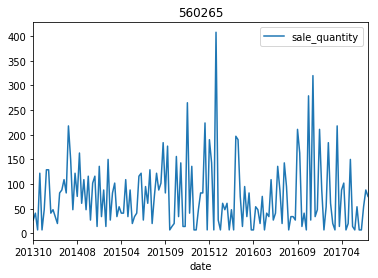

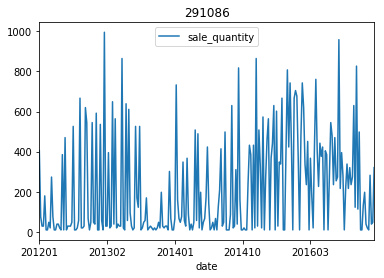

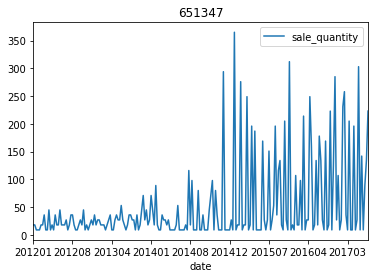

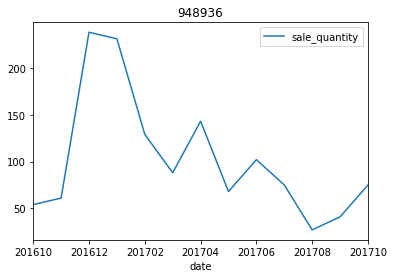

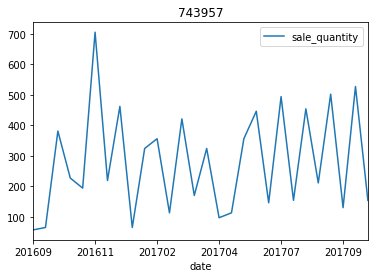

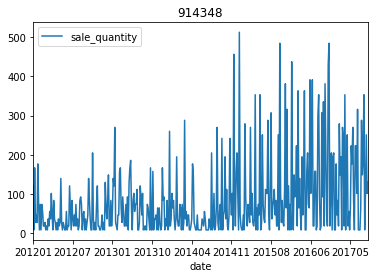

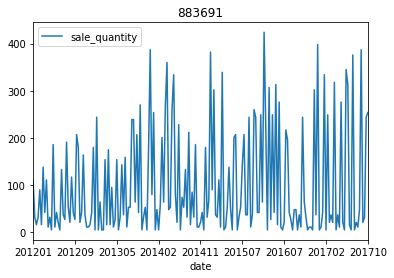

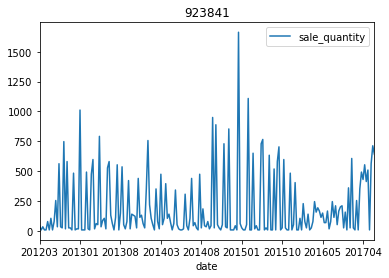

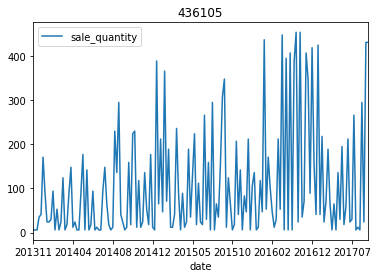

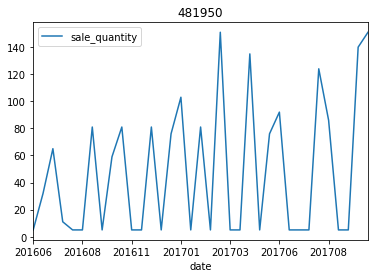

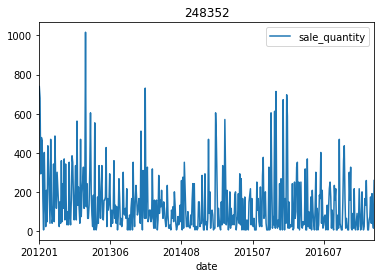

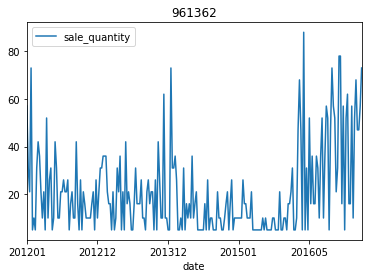

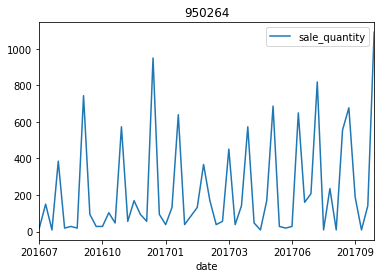

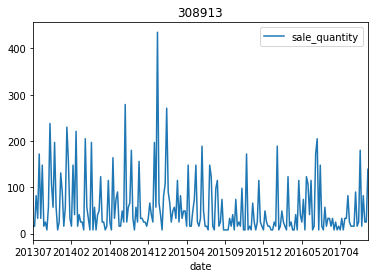

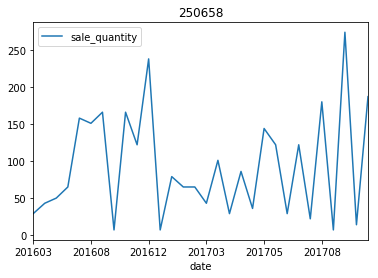

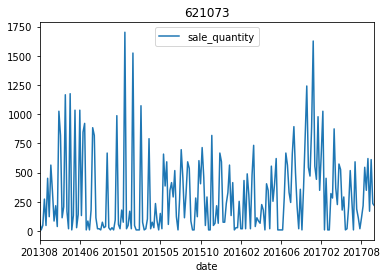

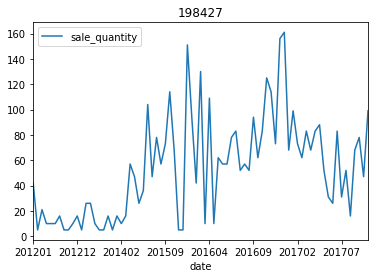

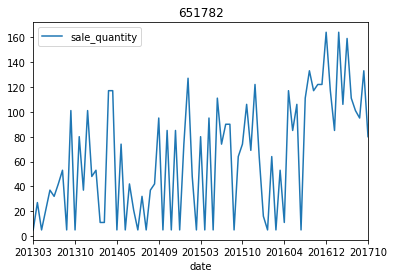

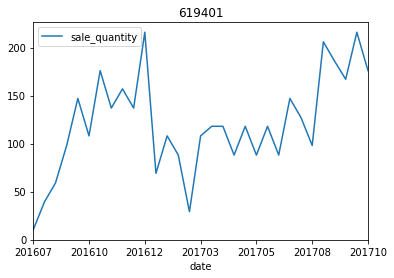

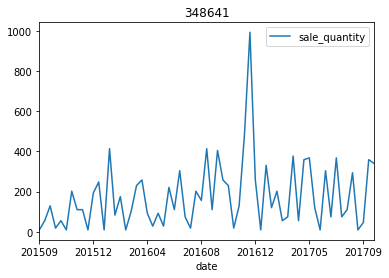

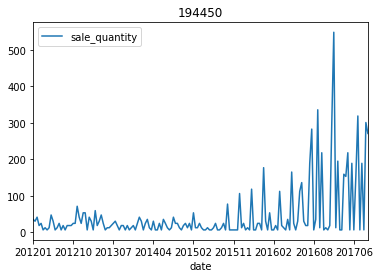

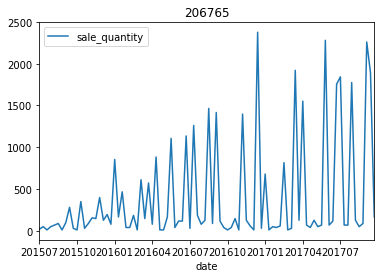

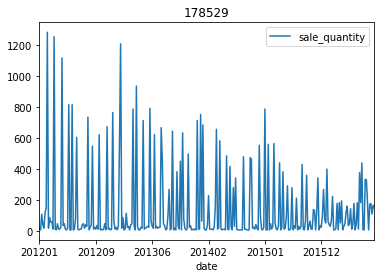

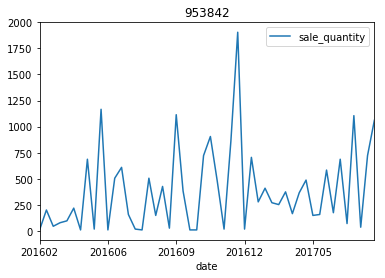

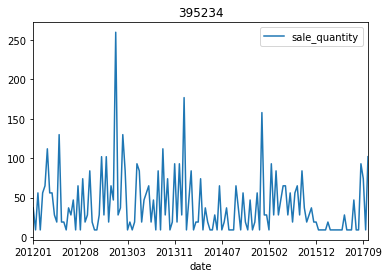

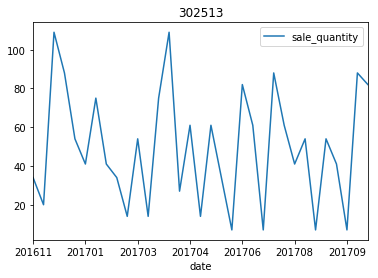

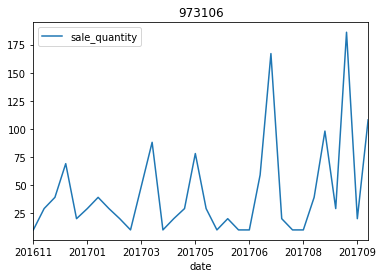

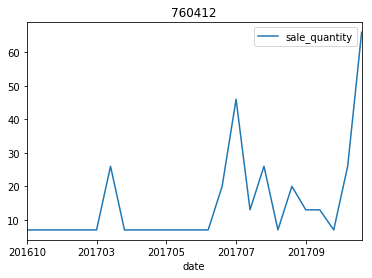

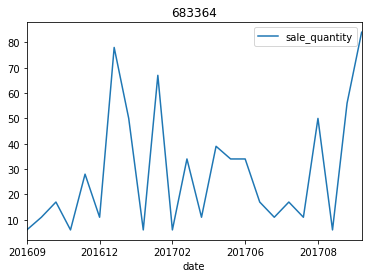

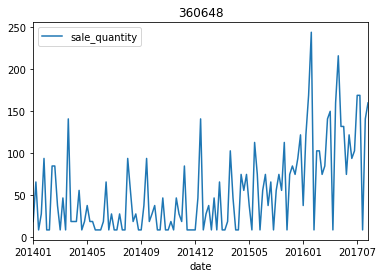

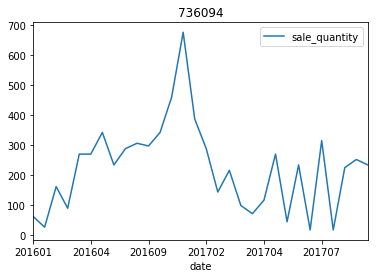

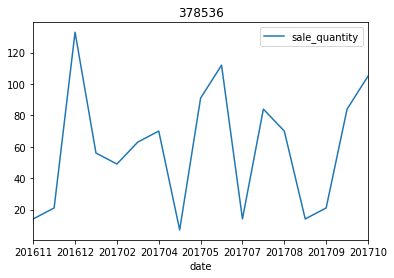

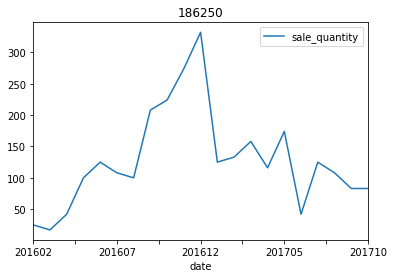

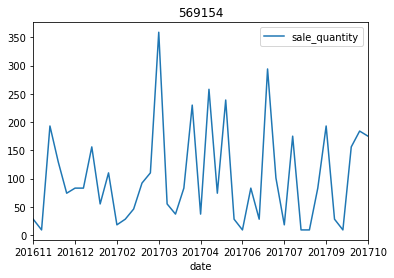

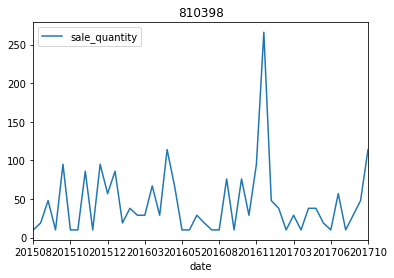

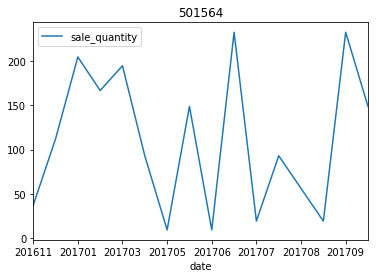

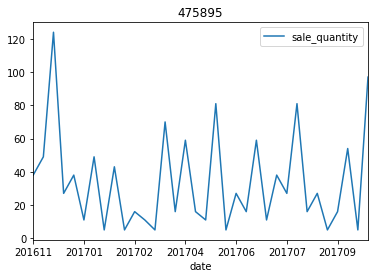

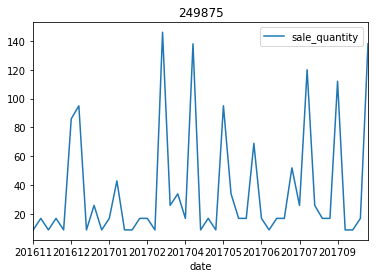

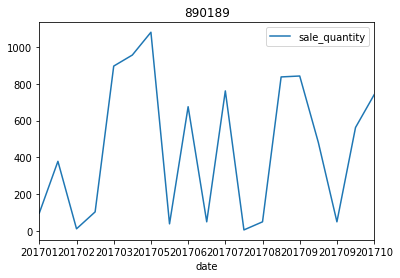

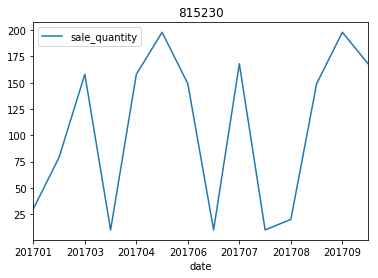

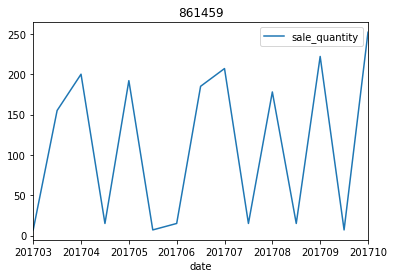

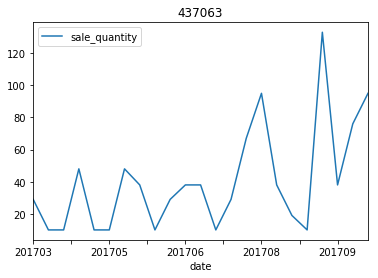

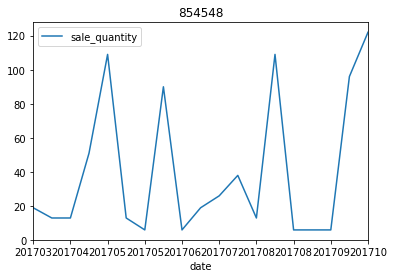

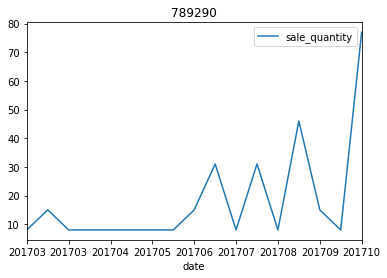

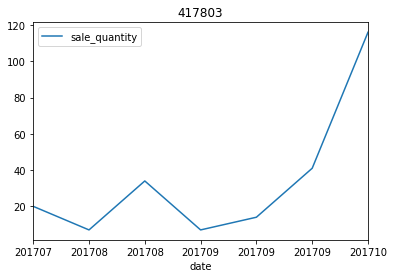

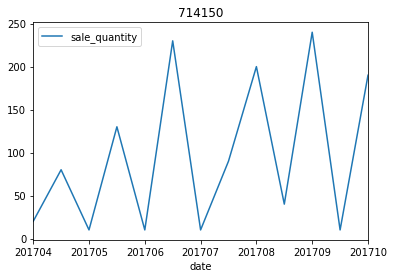

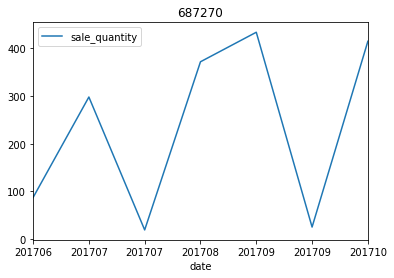

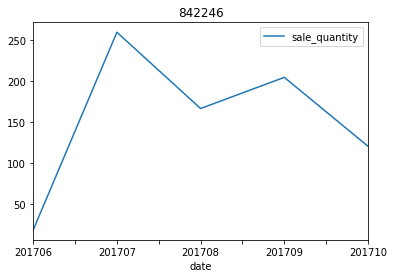

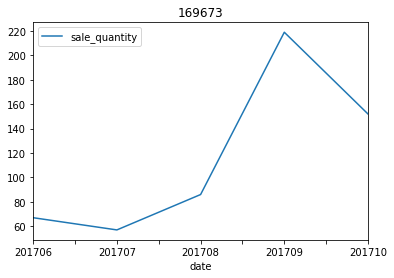

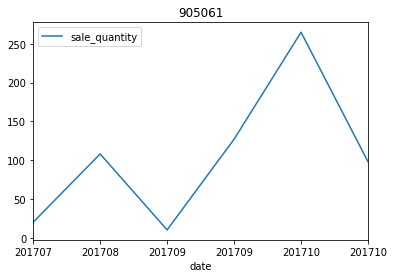

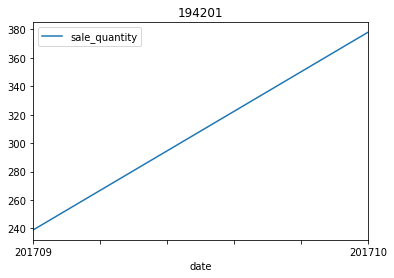

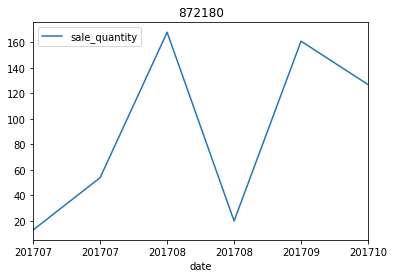

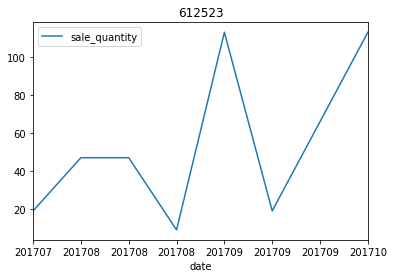

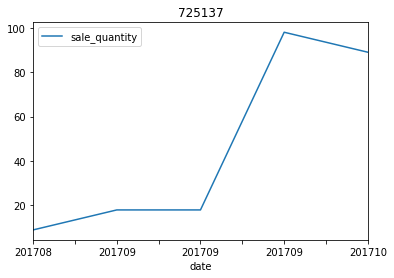

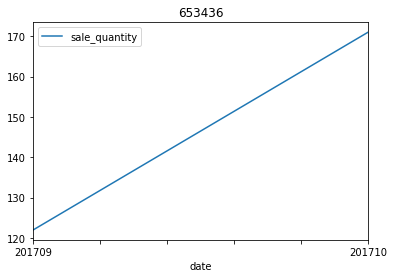

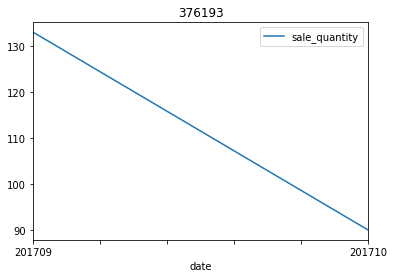

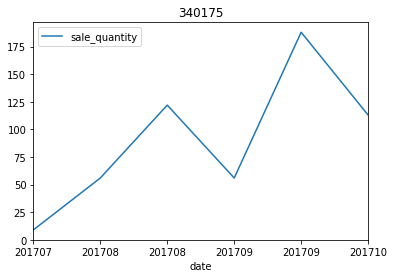

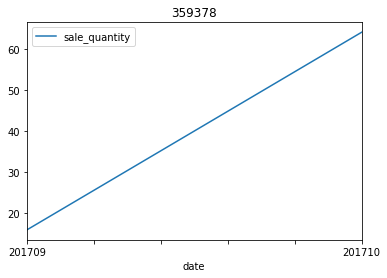

In [7]:
def plotAll():
    for i, id in enumerate(_df.classid.drop_duplicates()):
        _df[_df.classid == id].sort_values(by=['date'], ascending=[1]).plot(x='date', y='sale_quantity', title=id)
    plt.show()
plotAll()

In [23]:
_df[ (_df['classid'] == '714860').values & (_df['date'] == '201510').values ]

date classid  sale_quantity  compartment  level_id   TR  \
5245   201510  714860             95            3       2.0  6.0   
5654   201510  714860             27            3       2.0  7.0   
7525   201510  714860            912            3       2.0  6.0   
14239  201510  714860             11            3       2.0  6.0   

       displacement  if_charging  price_level  if_MPV_id       ...         \
5245            1.8            1         12.5          1       ...          
5654            1.6            0         12.5          1       ...          
7525            1.8            1         12.5          1       ...          
14239           1.8            1         12.5          1       ...          

       newenergy_type_id_4  emission_standards_id_1  emission_standards_id_2  \
5245                     0                        1                        0   
5654                     0                        0                        0   
7525                     0                        0                        0   
14239                    0                        0                        0   

       emission_standards_id_3  emission_standards_id_5  gearbox_type_AMT  \
5245                         0                        0                 0   
5654                         1                        0                 0   
7525                         1                        0                 0   
14239                        1                        0                 0   

       gearbox_type_AT  gearbox_type_CVT  gearbox_type_DCT  gearbox_type_MT  
5245                 1                 0                 0                0  
5654                 0                 0                 0                1  
7525                 1                 0                 0                0  
14239                0                 1                 0                0  

[4 rows x 90 columns]

In [ ]:
n